In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from sklearn.model_selection import train_test_split
d=pd.read_csv('/content/train.csv')
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
d.isnull().sum()*100/len(d)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

 

*  Since 77% of cabin are null values drop the  cabin cloumn




 





In [7]:
df=d.drop(['Cabin'],axis=1)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


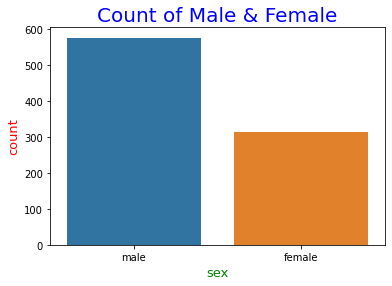

male      577
female    314
Name: Sex, dtype: int64


In [9]:
sb.countplot('Sex',data=df)
plt.title("Count of Male & Female",c='blue',size=20)
plt.ylabel("count",c='red',size=13)
plt.xlabel("sex",c="green",size=13)
plt.show()
print(d['Sex'].value_counts())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


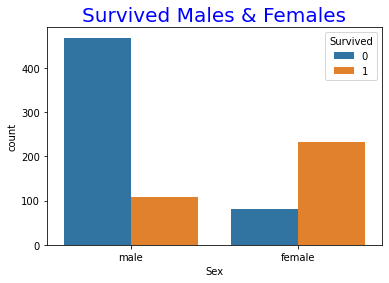

In [10]:
sb.countplot('Sex',hue='Survived',data=df)
plt.title("Survived Males & Females",c='blue',size=20)
plt.show()

**Observation**

*  From above we can see the survival of male is less 
*  And survival of females are more







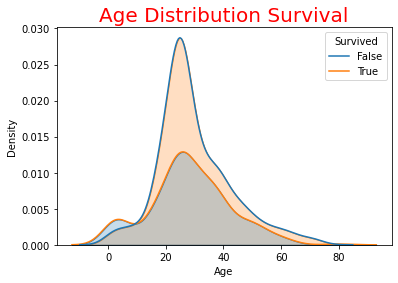

In [44]:
sb.kdeplot('Age',data=df,hue=df['Survived']==0 ,shade=True)
sb.kdeplot('Age',data=df,hue=df['Survived']==1)
plt.title("Age Distribution Survival",c='red',size=20)
plt.show()


**Observation**

*   As we can see the most survived age group is 20 - 40 
*   And the survival is max from 0 - 10 years old
*   And the least survival age group is from 60 - 80





/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


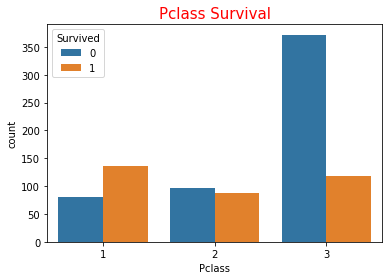

In [12]:
sb.countplot('Pclass',data=df,hue='Survived')
plt.title("Pclass Survival",c='red',size=15)
plt.show()

**Observation**

*   The survival in class 1 and 2 is more compared to class 3




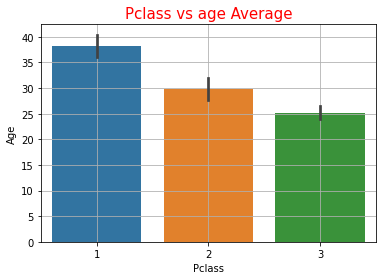

In [13]:
sb.barplot(x='Pclass',y='Age',data=df)
plt.title("Pclass vs age Average",c='red',size=15)
plt.grid()
plt.show()

**Observation**

*   The average age of class 1 is 38 and class 2 is 30 and class 3 is 25
*   So replace the null values of age with the above values



In [14]:
import numpy as np
def fillvalue(value):
  age=value[0]
  pclass=value[1]
  if np.isnan(age):
    if pclass==1:
      return 38
    elif pclass==2:
      return 30
    else:
      return 25
  else:
    return age
df['Age']=df[['Age','Pclass']].apply(fillvalue,axis=1)            

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


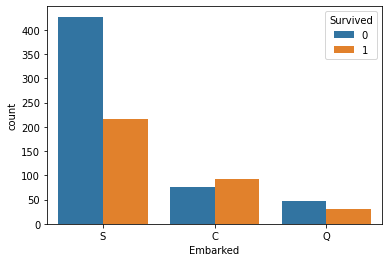

In [15]:
sb.countplot('Embarked',data=df,hue='Survived')
plt.show()

**Observation**

*   Most of the people are from Embark S 
*   And many people from S didn't survive



In [16]:
#Embarked has only 2 null values so we drop them
df.dropna(inplace=True)

In [17]:
#drop the unnecessary columns 
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [18]:
#converting the strings into integers to train the model
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [19]:
#splitting the data into i/p and o/p
x=df.drop('Survived',axis=1)
y=df['Survived']
print(x)
print(y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  25.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[889 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [20]:
#splitting the data into train and test samples
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [21]:
#initalising the library to variable model
model=LogisticRegression()


In [22]:
#fitting the train values
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_train_pred=model.predict(x_train)
print(y_train_pred)
print(len(y_train_pred))

[1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 

In [24]:
y_train

318    1
705    0
347    1
490    0
441    0
      ..
837    0
193    1
630    1
560    0
685    0
Name: Survived, Length: 666, dtype: int64

In [25]:
#accuarcy of train data
from sklearn.metrics import accuracy_score
td=accuracy_score(y_train_pred,y_train)*100
print("Accuracy score of Training Data:" ,td)

Accuracy score of Training Data: 82.43243243243244


In [26]:
#accuracy of test data
y_test_pred=model.predict(x_test)


In [27]:
ted=accuracy_score(y_test_pred,y_test)*100
print("Accuracy of Test data :",ted)

Accuracy of Test data : 75.7847533632287


**Testing the test data set**

In [28]:
test_df=pd.read_csv('/content/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
dff=test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1 )


In [30]:
dff.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [31]:
dff['Age']=dff[['Age','Pclass']].apply(fillvalue,axis=1)
dff['Fare']=dff['Fare'].fillna(dff['Fare'].mean())

In [32]:
dff.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
#converting the strings into integers to train the model
dff.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [34]:
test_data_pred=model.predict(dff)
test_data_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,